In [112]:
from pyspark.sql.types import IntegerType, FloatType
from pyspark.sql import SparkSession, DataFrame
import pyspark.sql.functions as F
import findspark

In [113]:
findspark.init()
findspark.find()


'C:\\Spark\\spark-3.0.3-bin-hadoop2.7'

In [114]:
spark = SparkSession \
.builder \
.appName("Phân tích điểm thi đai học") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()


In [111]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
         .appName('SparkByExamples.com') \
         .getOrCreate()

In [7]:
data = [('James','','Smith','1991-04-01','M',3000),
  ('Michael','Rose','','2000-05-19','M',4000),
  ('Robert','','Williams','1978-09-05','M',4000),
  ('Maria','Anne','Jones','1967-12-01','F',4000),
  ('Jen','Mary','Brown','1980-02-17','F',-1)
]

columns = ["firstname","middlename","lastname","dob","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)

In [8]:
df.show()

+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+



 Read file csv

In [18]:
df = spark.read.csv("Diemthi2021.csv", header = True)
df.printSchema()
df.show(5)

root
 |-- SBD: string (nullable = true)
 |-- Toan: string (nullable = true)
 |-- Ngu_van: string (nullable = true)
 |-- Ngoai_ngu: string (nullable = true)
 |-- Vat_ly: string (nullable = true)
 |-- Hoa_hoc: string (nullable = true)
 |-- Sinh_hoc: string (nullable = true)
 |-- Lich_su: string (nullable = true)
 |-- Dia_ly: string (nullable = true)
 |-- GDCD: string (nullable = true)
 |-- Cum_thi: string (nullable = true)

+-------+----+-------+---------+------+-------+--------+-------+------+----+-------+
|    SBD|Toan|Ngu_van|Ngoai_ngu|Vat_ly|Hoa_hoc|Sinh_hoc|Lich_su|Dia_ly|GDCD|Cum_thi|
+-------+----+-------+---------+------+-------+--------+-------+------+----+-------+
|1000001| 2.2|    3.5|     null|  null|   null|    null|    2.5|   5.5|null|      1|
|1000002| 9.2|   8.25|       10|  null|   null|    null|   5.75|  9.75|9.25|      1|
|1000003| 4.4|   6.25|     null|  null|   null|    null|   4.25|     4|null|      1|
|1000004| 8.4|   6.75|       10|     4|      3|     3.5|   null|

In [19]:
#Convering str to float
df = df.withColumn('Toan', F.col('Toan').cast(FloatType()))
df = df.withColumn('Ngu_van', F.col('Ngu_van').cast(FloatType()))
df = df.withColumn('Ngoai_ngu',F.col('Ngoai_ngu').cast(FloatType()))
df = df.withColumn('Vat_ly', F.col('Vat_ly').cast(FloatType()))
df = df.withColumn('Hoa_hoc', F.col('Hoa_hoc').cast(FloatType()))
df = df.withColumn('Sinh_hoc', F.col('Sinh_hoc').cast(FloatType()))
df = df.withColumn('Lich_su', F.col('Lich_su').cast(FloatType()))
df = df.withColumn('Dia_ly', F.col('Dia_ly').cast(FloatType()))
df = df.withColumn('GDCD', F.col('GDCD').cast(FloatType()))
df = df.withColumn('Cum_thi', F.col('Cum_thi').cast(IntegerType()))
df.printSchema()

root
 |-- SBD: string (nullable = true)
 |-- Toan: float (nullable = true)
 |-- Ngu_van: float (nullable = true)
 |-- Ngoai_ngu: float (nullable = true)
 |-- Vat_ly: float (nullable = true)
 |-- Hoa_hoc: float (nullable = true)
 |-- Sinh_hoc: float (nullable = true)
 |-- Lich_su: float (nullable = true)
 |-- Dia_ly: float (nullable = true)
 |-- GDCD: float (nullable = true)
 |-- Cum_thi: integer (nullable = true)



In [20]:
#PySpark SQL Tutorial
df.createOrReplaceTempView("Diemthidh2021")
df2 = spark.sql("SELECT * from Diemthidh2021")
df2.printSchema()
df2.show(5)

root
 |-- SBD: string (nullable = true)
 |-- Toan: float (nullable = true)
 |-- Ngu_van: float (nullable = true)
 |-- Ngoai_ngu: float (nullable = true)
 |-- Vat_ly: float (nullable = true)
 |-- Hoa_hoc: float (nullable = true)
 |-- Sinh_hoc: float (nullable = true)
 |-- Lich_su: float (nullable = true)
 |-- Dia_ly: float (nullable = true)
 |-- GDCD: float (nullable = true)
 |-- Cum_thi: integer (nullable = true)

+-------+----+-------+---------+------+-------+--------+-------+------+----+-------+
|    SBD|Toan|Ngu_van|Ngoai_ngu|Vat_ly|Hoa_hoc|Sinh_hoc|Lich_su|Dia_ly|GDCD|Cum_thi|
+-------+----+-------+---------+------+-------+--------+-------+------+----+-------+
|1000001| 2.2|    3.5|     null|  null|   null|    null|    2.5|   5.5|null|      1|
|1000002| 9.2|   8.25|     10.0|  null|   null|    null|   5.75|  9.75|9.25|      1|
|1000003| 4.4|   6.25|     null|  null|   null|    null|   4.25|   4.0|null|      1|
|1000004| 8.4|   6.75|     10.0|   4.0|    3.0|     3.5|   null|  null|n

In [21]:
#Lấy tất cả thí sinh có điểm toán =9 và Lý, Hoá > 9
get = spark.sql("SELECT SBD,Toan, Vat_ly,Hoa_hoc from Diemthidh2021 where Toan ==9.0 and Vat_ly >8.0 and Hoa_hoc >9.0")
get.show(5)
print(f"Số lượng thí sinh thoả mãn là: {get.count()}")

+-------+----+------+-------+
|    SBD|Toan|Vat_ly|Hoa_hoc|
+-------+----+------+-------+
|1002561| 9.0|  8.25|    9.5|
|1007560| 9.0|  8.75|   9.25|
|1009322| 9.0|  8.25|    9.5|
|1010947| 9.0|  8.75|   9.25|
|1015484| 9.0|  8.75|    9.5|
+-------+----+------+-------+
only showing top 5 rows

Số lượng thí sinh thoả mãn là: 414


In [22]:
groupDF = spark.sql("SELECT Cum_thi,Count(*) As So_luong from Diemthidh2021 group by Cum_thi order by Cum_thi")
groupDF.show(5)

+-------+--------+
|Cum_thi|So_luong|
+-------+--------+
|      1|  100691|
|      2|   86259|
|      3|   23241|
|      4|   12631|
|      5|    5603|
+-------+--------+
only showing top 5 rows



In [23]:
data = groupDF.toPandas()

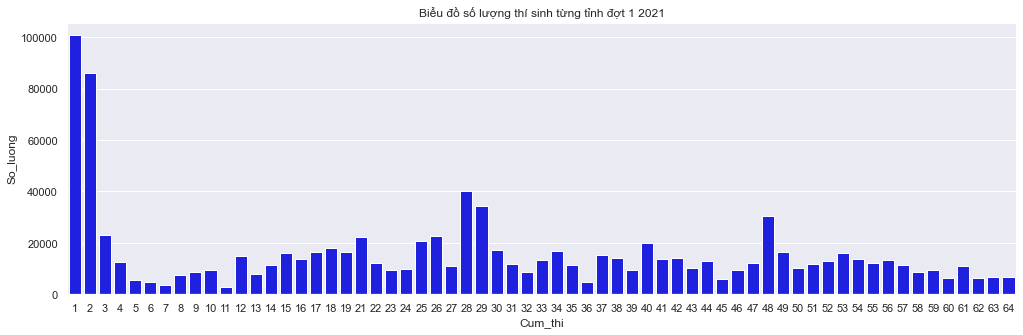

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize = (17,5))
sns.set_theme(style='darkgrid')
sns.barplot(x = data['Cum_thi'], y = data['So_luong'] , color = "Blue")
plt.title("Biểu đồ số lượng thí sinh từng tỉnh đợt 1 2021");

In [33]:
df_pandas = df.toPandas()

In [35]:
df_pandas.head()

,SBD,Toan,Ngu_van,Ngoai_ngu,Vat_ly,Hoa_hoc,Sinh_hoc,Lich_su,Dia_ly,GDCD,Cum_thi
0,1000001,2.2,3.50,NaN,NaN,NaN,NaN,2.50,5.50,NaN,1
1,1000002,9.2,8.25,10.0,NaN,NaN,NaN,5.75,9.75,9.25,1
2,1000003,4.4,6.25,NaN,NaN,NaN,NaN,4.25,4.00,NaN,1
3,1000004,8.4,6.75,10.0,4.00,3.00,3.50,NaN,NaN,NaN,1
4,1000005,8.8,8.25,9.4,8.25,5.75,5.25,NaN,NaN,NaN,1


In [43]:
Toan  = df_pandas.Toan.value_counts().sort_index()

In [65]:
import numpy as np

In [66]:
Toan.index = Toan.index.to_series().apply(lambda x: np.round(x,2))

Text(0.5, 1.0, 'Phổ điểm môn Toán')

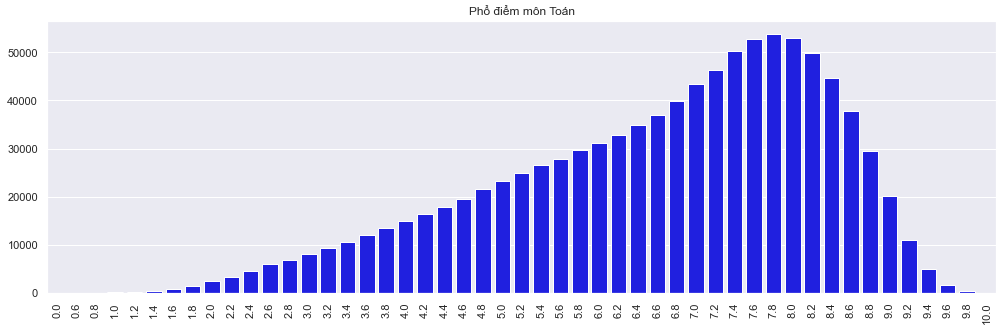

In [95]:
plt.subplots(figsize = (17,5))
sns.barplot(y =Toan.values, x = Toan.index, color = "Blue")
plt.xticks(rotation=90);
plt.title("Phổ điểm môn Toán")

Text(0.5, 1.0, 'Phổ điểm môn Hoá')

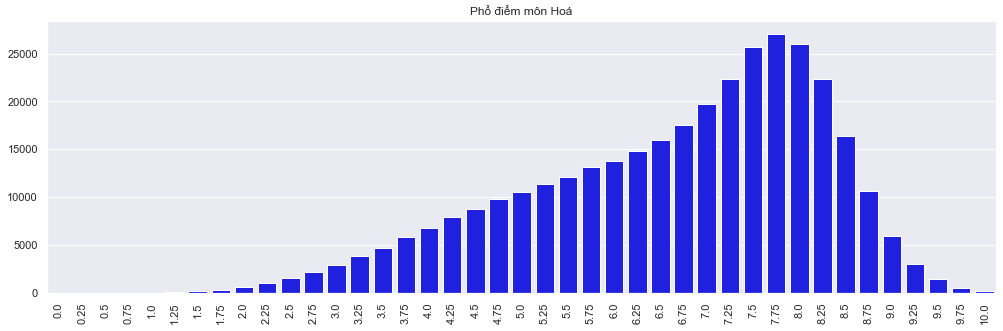

In [92]:
Hoa  = df_pandas.Hoa_hoc.value_counts().sort_index()
Hoa.index = Hoa.index.to_series().apply(lambda x: np.round(x,2))
plt.subplots(figsize = (17,5))
sns.barplot(y =Hoa.values, x = Hoa.index, color = "Blue")
plt.xticks(rotation=90);
plt.title("Phổ điểm môn Hoá")

Text(0.5, 1.0, 'Phổ điểm môn Tiếng anh')

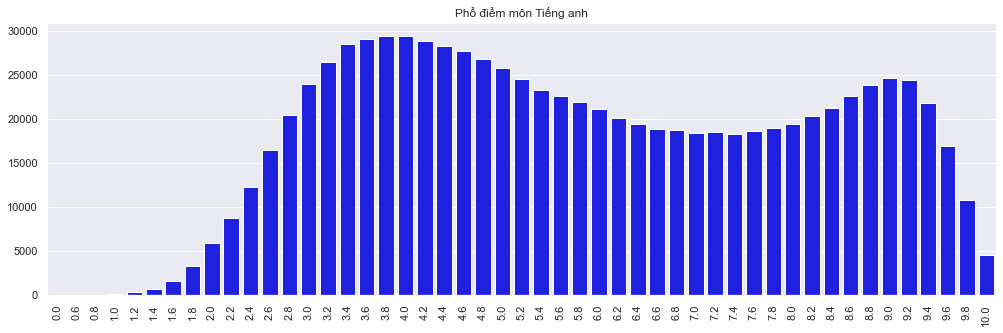

In [93]:
Ngoai_ngu  = df_pandas.Ngoai_ngu.value_counts().sort_index()
Ngoai_ngu.index = Ngoai_ngu.index.to_series().apply(lambda x: np.round(x,2))
plt.subplots(figsize = (17,5))
sns.barplot(y =Ngoai_ngu.values, x = Ngoai_ngu.index, color = "Blue")
plt.xticks(rotation=90);
plt.title("Phổ điểm môn Tiếng anh")